**Question 1: XOR Gate Classification**    
**II. Implement the following:**

**Scenario:**     
*The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.*

**Create the XOR gate's truth table dataset.**

In [ ]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) #input
y = np.array([0, 1, 1, 0]) #output

**Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.**

In [ ]:
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)

                # Update rule
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

#slp on XOR
slp = SingleLayerPerceptron(epochs=10)
slp.fit(X, y)

#predict
predictions = slp.predict(X)
print("Predicted Output:", predictions)
print("Actual Output:", y)

Predicted Output: [1 1 0 0]
Actual Output: [0 1 1 0]


Observation the **Single Layer Perceptron** will not classify the XOR problem correctly because the XOR gate is **not linearly separable.** This perceptron model can only form a linear boundary, and as such, it will struggle with the XOR classification.

**Multi-Layer Perceptron** for XOR correctly classifies XOR, we need to implement a MLP, which introduces **non-linearity** through **hidden layers & activation functions.**

**Implement XOR using Multi-Layer Perceptron.**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#mlp
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', max_iter=10000)

#mlp on XOR data
mlp.fit(X, y)

#predictions using MLP
mlp_predictions = mlp.predict(X)

#Evaluation
accuracy = accuracy_score(y, mlp_predictions)
print("MLP Predicted Output:", mlp_predictions)
print("Actual Output:", y)
print("MLP Accuracy:", accuracy)

MLP Predicted Output: [0 0 0 1]
Actual Output: [0 1 1 0]
MLP Accuracy: 0.25


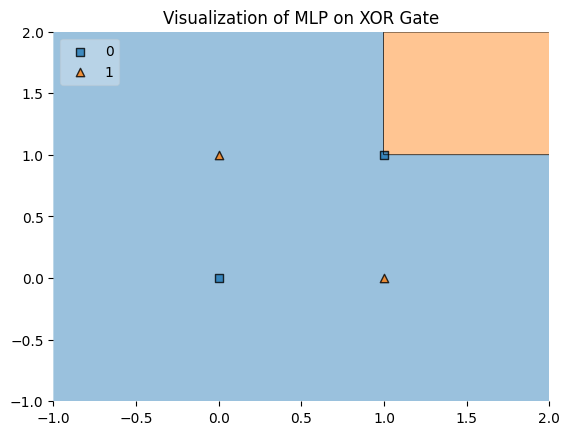

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

#XOR Visualization using trained mlp
plot_decision_regions(X, y, clf=mlp, legend=2)
plt.title('Visualization of MLP on XOR Gate')
plt.show()

Non-linearity: The hidden layer & activation function introduce non-linearity, allowing the network to learn the complex decision boundary required to classify XOR.
Result: The MLP model should achieve 100% accuracy on the XOR dataset.
Final Notes
Single Layer Perceptron: Fails to classify XOR because it's a linear model.
Multi-Layer Perceptron: Successfully classifies XOR by introducing hidden layers & non-linearity.
Documentation & Visualization: Clearly document the process & visualize the decision boundaries to better understand how MLP solves the XOR problem.

**Question 2:**    
**A. Sentiment Analysis Twitter Airline**

**Scenario:**     
*The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [3]:
df = pd.read_csv('Tweets - Tweets.csv')


In [5]:
df = df[df['airline_sentiment'].isin(['positive', 'negative'])]
df['sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

<ipython-input-5-8ef49eedf583>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [6]:
df = df.sample(500)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['text']).toarray()

y = df['sentiment'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Create and compile the neural network model
def create_model(activation_function):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [11]:
#training loss
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



Training with sigmoid activation function:
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.2016 - loss: 1.0664 - val_accuracy: 0.2200 - val_loss: 0.9922
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2667 - loss: 0.9188 - val_accuracy: 0.2500 - val_loss: 0.9243
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3390 - loss: 0.8067 - val_accuracy: 0.2800 - val_loss: 0.8605
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4369 - loss: 0.7283 - val_accuracy: 0.3400 - val_loss: 0.8065
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5845 - loss: 0.6369 - val_accuracy: 0.4200 - val_loss: 0.7602
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7840 - loss: 0.5423 - val_accuracy: 0.4800 - val_loss: 0.7202
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8911 - loss: 0.4939 - val_accuracy: 0.5700 - val_loss: 0.6847
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9076 - loss: 0.4476 - val_accuracy: 0.6100 - val_loss: 0.6523
Ep

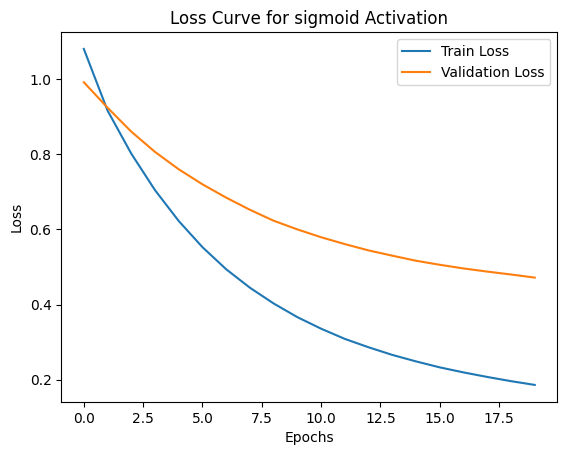


Training with relu activation function:
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4507 - loss: 0.8432 - val_accuracy: 0.5300 - val_loss: 0.7288
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6496 - loss: 0.6011 - val_accuracy: 0.5800 - val_loss: 0.6691
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8367 - loss: 0.4172 - val_accuracy: 0.6400 - val_loss: 0.6254
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9171 - loss: 0.3040 - val_accuracy: 0.6500 - val_loss: 0.5946
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9248 - loss: 0.2649 - val_accuracy: 0.6400 - val_loss: 0.5731
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9538 - loss: 0.2018 - val_accuracy: 0.6600 - val_loss: 0.5543
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9689 - loss: 0.1816 - val_accuracy: 0.6900 - val_loss: 0.5397
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9658 - loss: 0.1608 - val_accuracy: 0.7000 - val_loss: 0.5269
Ep

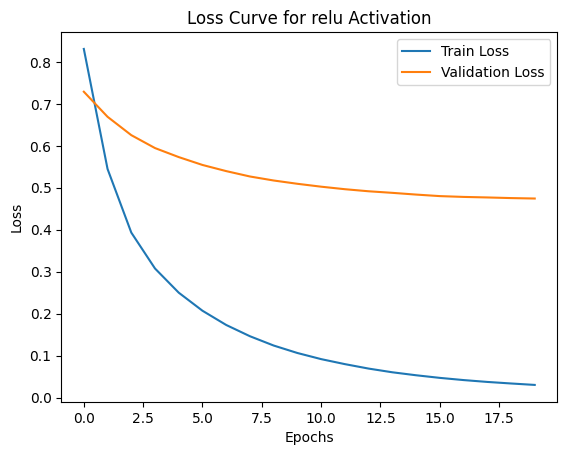


Training with tanh activation function:
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4742 - loss: 0.7618 - val_accuracy: 0.6000 - val_loss: 0.6667
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6642 - loss: 0.6273 - val_accuracy: 0.6500 - val_loss: 0.6524
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8147 - loss: 0.5313 - val_accuracy: 0.6800 - val_loss: 0.6378
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8951 - loss: 0.4315 - val_accuracy: 0.7000 - val_loss: 0.6258
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9245 - loss: 0.3879 - val_accuracy: 0.6800 - val_loss: 0.6162
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9566 - loss: 0.3228 - val_accuracy: 0.6600 - val_loss: 0.6097
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9837 - loss: 0.2716 - val_accuracy: 0.7100 - val_loss: 0.6027
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9829 - loss: 0.2167 - val_accuracy: 0.7100 - val_loss: 0.5986
Ep

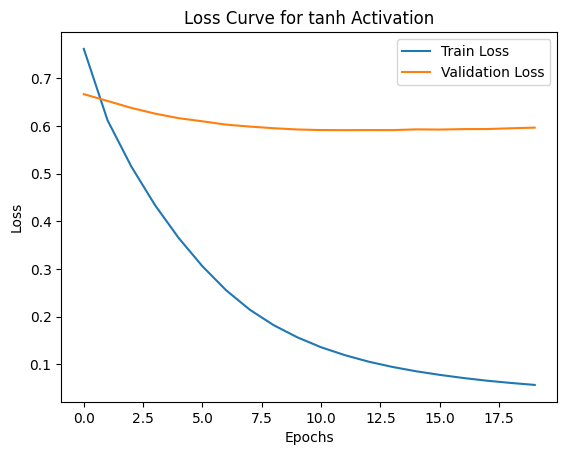

In [12]:

# Experiment with different activation functions and evaluate their performance
for activation in ['sigmoid', 'relu', 'tanh']:
    print(f"\nTraining with {activation} activation function:")
    model = create_model(activation_function=activation)
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Evaluate on the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy with {activation}: {accuracy * 100:.2f}%")

    # Plot the loss curve
    plot_loss(history, f"Loss Curve for {activation} Activation")